In [29]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data bestand
https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html

https://people.sc.fsu.edu/~jburkardt/datasets/regression/x09.txt

In [30]:
filename = 'x09.txt'
column_names = ['Index','One', 'Weight','Age','Blood_fat_content']
df = pd.read_fwf(filename,
                 skiprows=36,
                 skipfooter=1,
                 names=column_names,
                 index_col=0)
df

,One,Weight,Age,Blood_fat_content
Index,,,,
1,1,84,46,354
2,1,73,20,190
3,1,65,52,405
4,1,70,30,263
5,1,76,57,451
6,1,69,25,302
7,1,63,28,288
8,1,72,36,385
9,1,79,57,402


In [19]:
x1 = np.array(df['Weight'])
x2 = np.array(df['Age'])
y = np.array(df['Blood_fat_content'])

<IPython.core.display.Javascript object>


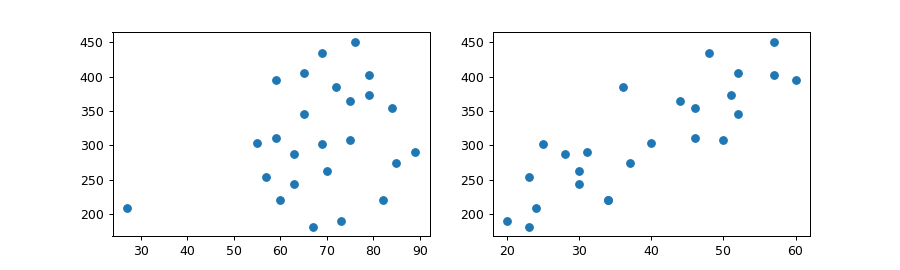

In [20]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.scatter(x1, y)

plt.subplot(122)
plt.scatter(x2, y)

plt.show()

In [21]:
coefs = np.polyfit(x1, y, 1)
fit1 = np.poly1d(coefs)

In [22]:
coefs = np.polyfit(x2, y, 1)
fit2 = np.poly1d(coefs)

<IPython.core.display.Javascript object>


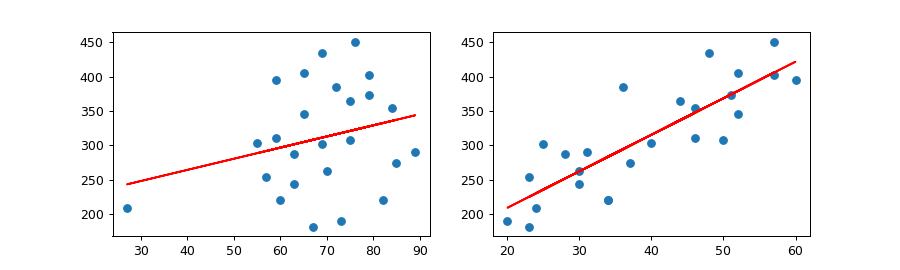

In [23]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.scatter(x1, y)
plt.plot(x1, fit1(x1), color='red')

plt.subplot(122)
plt.scatter(x2, y)
plt.plot(x2, fit2(x2), color='red')

plt.show()

In [9]:
def model(X, a0, a1, a2):
    x1, x2 = X
    return a0 + a1 * x1 + a2 * x2

In [10]:
print(np.all(model((x1, x2), 1, 0, 0) == 1))
print(np.all(model((x1, x2), 0, 1, 0) == x1))
print(np.all(model((x1, x2), 0, 0, 1) == x2))

True
True
True


In [11]:
from scipy import optimize
resultaat = optimize.curve_fit(model, (x1, x2), y)
coefs, *_ = resultaat
coefs

array([77.98253862,  0.4173621 ,  5.21659081])

In [24]:
from functools import partial
fit2d = partial(model, a0=coefs[0], a1=coefs[1], a2=coefs[2])

IndexError: index 2 is out of bounds for axis 0 with size 2

In [25]:
fit2d((x1, x2))

array([353.00413212, 212.781788  , 376.37379709, 263.69560979,
       407.04773422, 237.19529365, 250.34089349, 295.82987884,
       408.29982052, 338.81469161, 214.44949469, 276.84208048,
       376.37379709, 221.75376685, 415.60235097, 357.17688225,
       280.38835204, 377.00027567, 370.11423646, 289.57031822,
       342.57007965, 225.92738784, 306.47217694, 309.6010864 ,
       260.7740751 ])

<IPython.core.display.Javascript object>


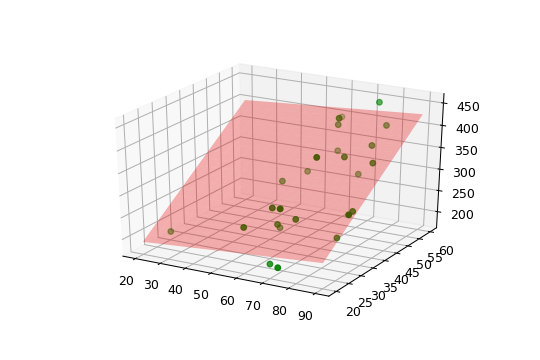

In [28]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib nbagg

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X1, X2 = np.meshgrid(np.linspace(20, 90, 20), np.linspace(20, 60, 20))

# Y = model((X1, X2), *coefs)
Y = fit2d((X1, X2))

ax.plot_surface(X1, X2, Y, alpha=0.3, color='red')

ax.scatter(x1, x2, y, color='green')

plt.show()